<a href="https://colab.research.google.com/github/dejanbatanjac/pytorch-learning-101/blob/master/Human_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install --no-deps fastai==1.0.47

from fastai.vision import *
from fastai import *

### Download images

Here we download 878 images to train and validate.

We have four categories: baby, child, man, woman.

Restrictions:

* Haven't used many images from the old/older people.
* Haven't used enough full body images, so the recognition will happen on face structure mostly.
* Haven't used anfas images in the training set.

Precision
I reached the precision of 92%. 615 images are used for training and 263 images for the validation.
Most confusion is inside between child and baby category.

As you may see down below there are 15 misclassified images:
```
[('baby', 'child', 8),
 ('child', 'woman', 4),
 ('child', 'baby', 2),
 ('woman', 'man', 2),
 ('baby', 'woman', 1),
 ('child', 'man', 1),
 ('man', 'child', 1)]
 ```
 


In [0]:
path = Path('data/')
classes = ["baby", "child", "man", "woman"]

for _ in classes:     
    folder = _ #'baby' 
    dest = path/_    
    dest.mkdir(parents=True, exist_ok=True)
    url = "https://raw.githubusercontent.com/dejanbatanjac/pytorch-learning-101/master/class2/" + _ + ".csv"
    print (url)
    !wget url "{url}"

In [0]:
!ls 
!ls data





baby.csv  child.csv  data  man.csv  sample_data  woman.csv
baby  child  man  woman


In [0]:
#download_images("baby.csv", dest, max_pics=200)

In [0]:
for _ in classes:  
    dest = path/_
    print(dest)
    download_images(_ + ".csv", dest, max_pics=300)

data/baby


data/child


data/man


data/woman


You will need to run this cell once per each category.

In [0]:
#!ls data/baby
#!ls data/man
#!ls data/child
!ls data/woman

00000000.jpg   00000057.jpg   00000114.jpg   00000171.png   00000228.jpg
00000001.jpg   00000058.jpg   00000115.jpg   00000172.jpg   00000229.jpg
00000002.jpg   00000059.jpg   00000116.jpg   00000173.jpg   00000230.jpg
00000003.jpg   00000060.jpg   00000117.jpg   00000174.jpg   00000231.jpeg
00000004.jpg   00000061.jpg   00000118.jpeg  00000175.png   00000232.jpg
00000005.jpeg  00000062.png   00000119.jpg   00000176.jpg   00000233.jpg
00000006.jpg   00000063.jpg   00000120.jpg   00000177.jpg   00000234.jpg
00000007.jpg   00000064.jpg   00000121.JPG   00000178.jpg   00000235.jpg
00000008.jpg   00000065.jpg   00000122.jpg   00000179.png   00000236.jpg
00000009.jpg   00000066.jpg   00000123.jpg   00000180.jpg   00000237.jpg
00000010.jpg   00000067.jpg   00000124.jpg   00000181.jpg   00000238.jpg
00000011.jpg   00000068.jpg   00000125.png   00000182.jpg   00000239.jpg
00000012.jpg   00000069.jpg   00000126.jpg   00000183.jpeg  00000240.jpg
00000013.jpg   00000070.png   00000127.jpg   00000

## Verify images


Then we can remove non images (cann't be open):

In [0]:
for _ in classes:  
    dest = path/_    
    print(dest)
    verify_images(dest, delete=True, max_size=500) # delete True will delete images for you

data/baby


data/child


data/man


data/woman


In [0]:
# count the number of images
for _ in classes:  
    dest = path/_ 
    print(dest)
    ! ls "{dest}" | wc -l

data/baby
205
data/child
214
data/man
178
data/woman
281


## Image data bunch


In [0]:
np.random.seed(42)
#normalize images

tfms = get_transforms(do_flip=True, flip_vert=False) #flipping makes it better
# tfms = ([rotate(degrees=11, p=0.5)], None ) 

data = ImageDataBunch.from_folder(path, train="train", valid_pct=0.3, 
                                  ds_tfms=tfms, size=224, num_workers=4)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (615 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
child,child,child,child,child
Path: data;

Valid: LabelList (263 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
woman,woman,baby,woman,woman
Path: data;

Test: None

In [0]:
print(type(data))

# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

<class 'fastai.vision.data.ImageDataBunch'>


Good! Let's take a look at some of our pictures then.

In [0]:
data.classes

['baby', 'child', 'man', 'woman']

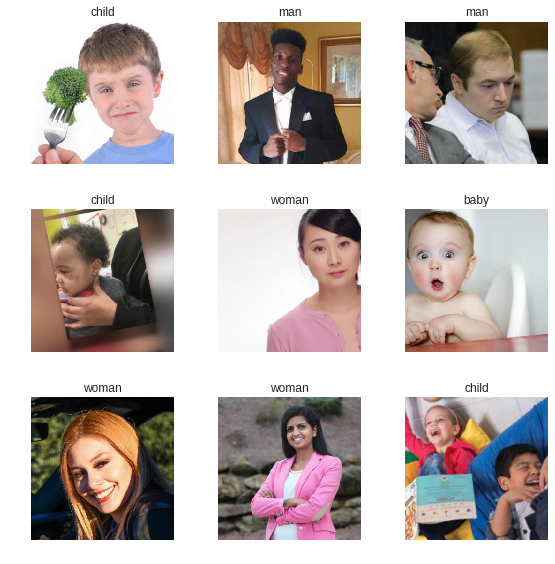

In [0]:
data.show_batch(rows=3, figsize=(8,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baby', 'child', 'man', 'woman'], 4, 615, 263)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.047944,0.304908,0.110266,00:11


In [0]:
learn.save('stage-7')

In [0]:
learn.load('stage-7')

In [0]:
print(learn)

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


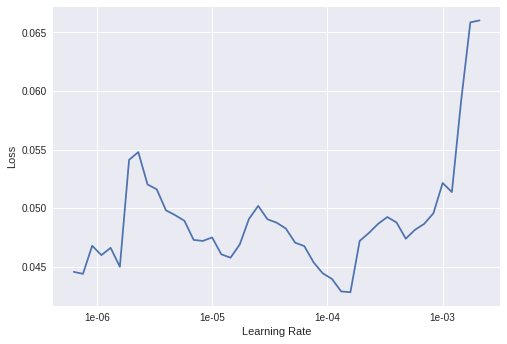

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.003498,0.177844,0.072243,00:12
1,0.002553,0.178211,0.076046,00:13


In [0]:
learn.save('stage-12')

In [0]:
learn.load('stage-12')

In [0]:
!ls data/models
!ls
!ls data


stage-1.pth  stage-2.pth  tmp.pth
baby.csv    child.csv	 data	  man.csv.1    woman.csv
baby.csv.1  child.csv.1  man.csv  sample_data  woman.csv.1
baby  child  cleaned.csv  man  models  woman


## Interpretation

In [0]:
learn.load('stage-11');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

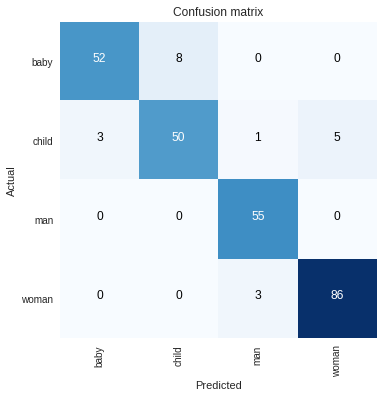

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()


[('baby', 'child', 8),
 ('child', 'woman', 4),
 ('child', 'baby', 2),
 ('woman', 'man', 2),
 ('baby', 'woman', 1),
 ('child', 'man', 1),
 ('man', 'child', 1)]

In [0]:
interp.plot_multi_top_losses(samples=15, save_misclassified=False)

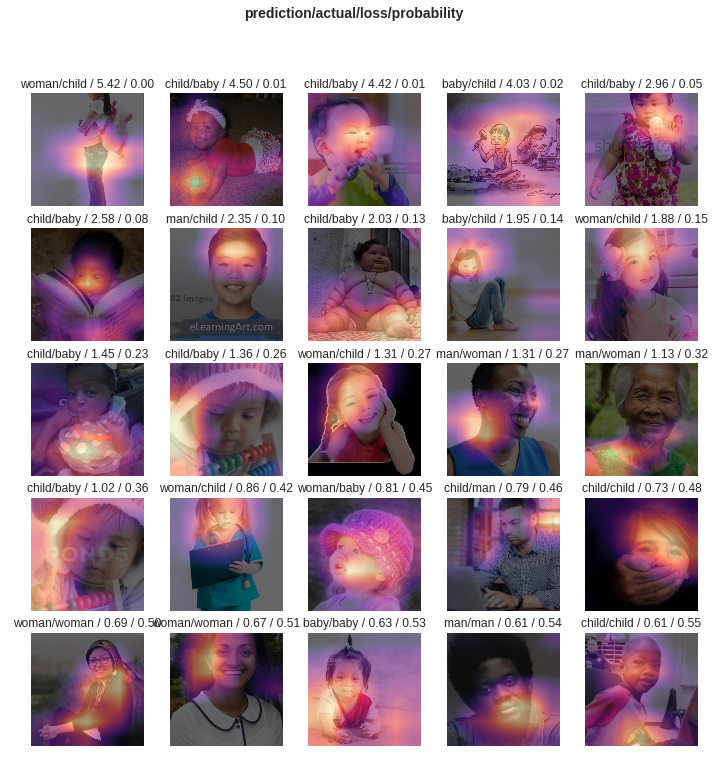

In [0]:
interp.plot_top_losses(25, figsize=(12,12))

In [0]:
losses, indexs = interp.top_losses( k=10, largest=True)
print(len(losses))
print(indexs)

10
tensor([ 23, 236,  54, 127, 132, 104, 134,   8, 251, 113])


In [0]:
# img=open_image(ds.x.items[73])
# img.show(title=ds.x.items[73])
#training set
print(len(ds.x.items))
    
for _ in indexs:
    #print (_, ds.x.items[_])
    img=open_image(ds.x.items[_])
    img.show(title=ds.x.items[_])

## Cleaning Up (Works only on Jupiter)

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import *


In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=20)
#ImageCleaner(ds, idxs, path)

In [0]:
# print (type(ds))
#print(ds)
#print(ds.x.items)
#print(ds.y.items)
#print(len(ds))
# print(idxs)
# #print (ds.to_csv("x.csv"))
#!cat data/x.csv

for _ in idxs:
    print (_, ds.x.items[_])
    img=open_image(ds.x.items[_])
    img.show(title=ds.x.items[_])


In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)
ImageCleaner(ds, idxs, path)

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)
ImageCleaner(ds, idxs, path, duplicates=True)

#Remember to recreate your ImageDataBunch from your cleaned.csv to include the changes you made in your data!

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs, path)

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

## Testing

In [0]:
defaults.device = torch.device('cpu')

In [0]:
path = Path('data')
# print(path)
# fn1 = path/"baby/00000001.jpg"
# print(fn1)

header = "User-Agent: Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.97 Safari/537.11"
# !wget {header} "https://theintelligentnest.files.wordpress.com/2013/08/sf-sister-and-baby-brother.jpg?w=608&h=400&crop=1" -o "z.jpg"
# !cp z.jpg data
# !ls data
# !pwd



img = open_image(fn2)
img.show(figsize=(5,5))




We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [0]:
print (fn3)
learn = load_learner(path)

data/z.jpg


In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

#??learn.predict


child
